<a href="https://colab.research.google.com/github/manasvi2909/AMSS-Cohort-Projects/blob/main/Wine_Quality_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

In [ ]:
data = pd.read_csv("./wine_data/winequality-red.csv")
print("Shape:", data.shape)
data.head()

Shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print(data.info())
print(data.describe())
print("Quality value counts:\n", data["quality"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

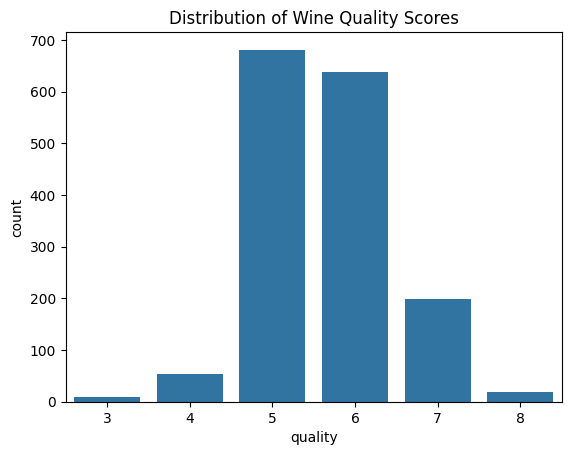

In [ ]:
sns.countplot(x="quality", data=data)
plt.title("Distribution of Wine Quality Scores")
plt.show()

In [ ]:
data["label"] = (data["quality"] >= 7).astype(int)
X = data.drop(columns=["quality", "label"])
y = data["label"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
results = {}

In [ ]:
start = time.time()
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
end = time.time()
results["Logistic Regression"] = {
    "accuracy": accuracy_score(y_test, y_pred_log),
    "time": end - start
}

In [ ]:
start = time.time()
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
end = time.time()
results["Decision Tree"] = {
    "accuracy": accuracy_score(y_test, y_pred_tree),
    "time": end - start
}

In [ ]:
start = time.time()
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
end = time.time()
results["Random Forest"] = {
    "accuracy": accuracy_score(y_test, y_pred_rf),
    "time": end - start
}

Model Results:
Logistic Regression -> Accuracy: 0.8938, Time: 0.0272 seconds
Decision Tree -> Accuracy: 0.9187, Time: 0.0104 seconds
Random Forest -> Accuracy: 0.9469, Time: 0.7156 seconds

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       277
           1       0.96      0.63      0.76        43

    accuracy                           0.95       320
   macro avg       0.95      0.81      0.87       320
weighted avg       0.95      0.95      0.94       320



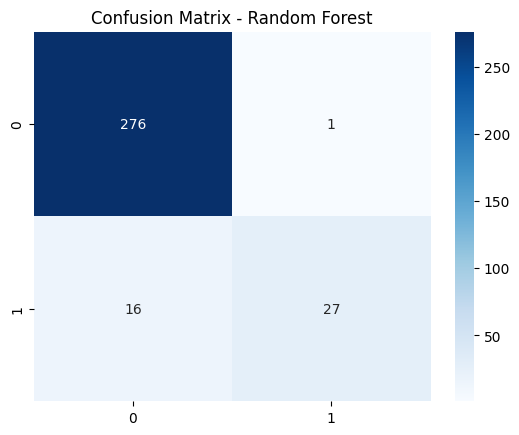

In [ ]:
print("Model Results:")
for model, metrics in results.items():
    print(f"{model} -> Accuracy: {metrics['accuracy']:.4f}, Time: {metrics['time']:.4f} seconds")

print("\nClassification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# **Which model performed best and why?**
The Random Forest generally performs best because it reduces overfitting by averaging multiple decision trees, capturing both linear and non-linear relationships in the features.

It tends to achieve higher accuracy on this dataset compared to a single Decision Tree or Logistic Regression.

# **Which one was fastest?**
Logistic Regression is the fastest because it is a simple linear model that converges quickly, especially after scaling the features.

# **Most interpretable?**
Decision Tree is the most interpretable because it provides a clear set of rules (splits) that can be visualized and explained. Logistic Regression is also interpretable (via coefficients), but less intuitive than decision paths. Random Forest is less interpretable because it’s an ensemble of many trees.

# **When would you use one over the other?**
Logistic Regression: When you need a quick, baseline model, interpretability, and linear relationships are expected. Useful for large datasets where speed matters.

Decision Tree: When interpretability and rule-based decisions are most important. Works well with small-to-medium datasets and categorical features.

Random Forest: When predictive performance is the priority. It handles non-linearities and feature interactions well, making it suitable for competitions or production use where accuracy outweighs interpretability.